In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import random

In [4]:
data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSet.csv')

In [5]:
data.set_index('Label')

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
0,14440,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,['Negative'],NaN,False
1,22593,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
2,21901,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
3,17351,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
4,1136,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False
...,...,...,...,...,...
21626,1458,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False
21627,16631,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,['Negative'],NaN,False
21628,8845,VitusData/Serier/Series2/CellsCorr/Serie_2_Ima...,['Negative'],NaN,False
21629,3391,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False


In [12]:
data.loc['Crack A']

In [24]:
negative.head()

In [25]:
sum(data['Label'] == 'Finger Failure')

In [26]:
fault_data = data[data['Label'] != 'Negative']

Mean: 132.0874831952388 
 Std:25.185651805938193


In [17]:
list(fault_data[fault_data['Label'] == 'Crack A']['ImageDir'])

120.0

In [18]:
data[data['Label'] != 'Crack A']

120.0

'nan'

nan

In [115]:
data.head()

In [117]:
data.groupby('Label').count()

['Finger Failure']
['Crack B']
['Finger Failure']
['Crack C']


In [95]:
#Plot distribution of labels and set header to "Label distribution"
fig = plt.figure(figsize=(5, 3))
sns.countplot(x='Label',
              data=data,
              palette='hls')
plt.title('Label distribution', fontsize=20)


4

/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_30936/466534396.py:38: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0.01)


<Figure size 200x400 with 0 Axes>

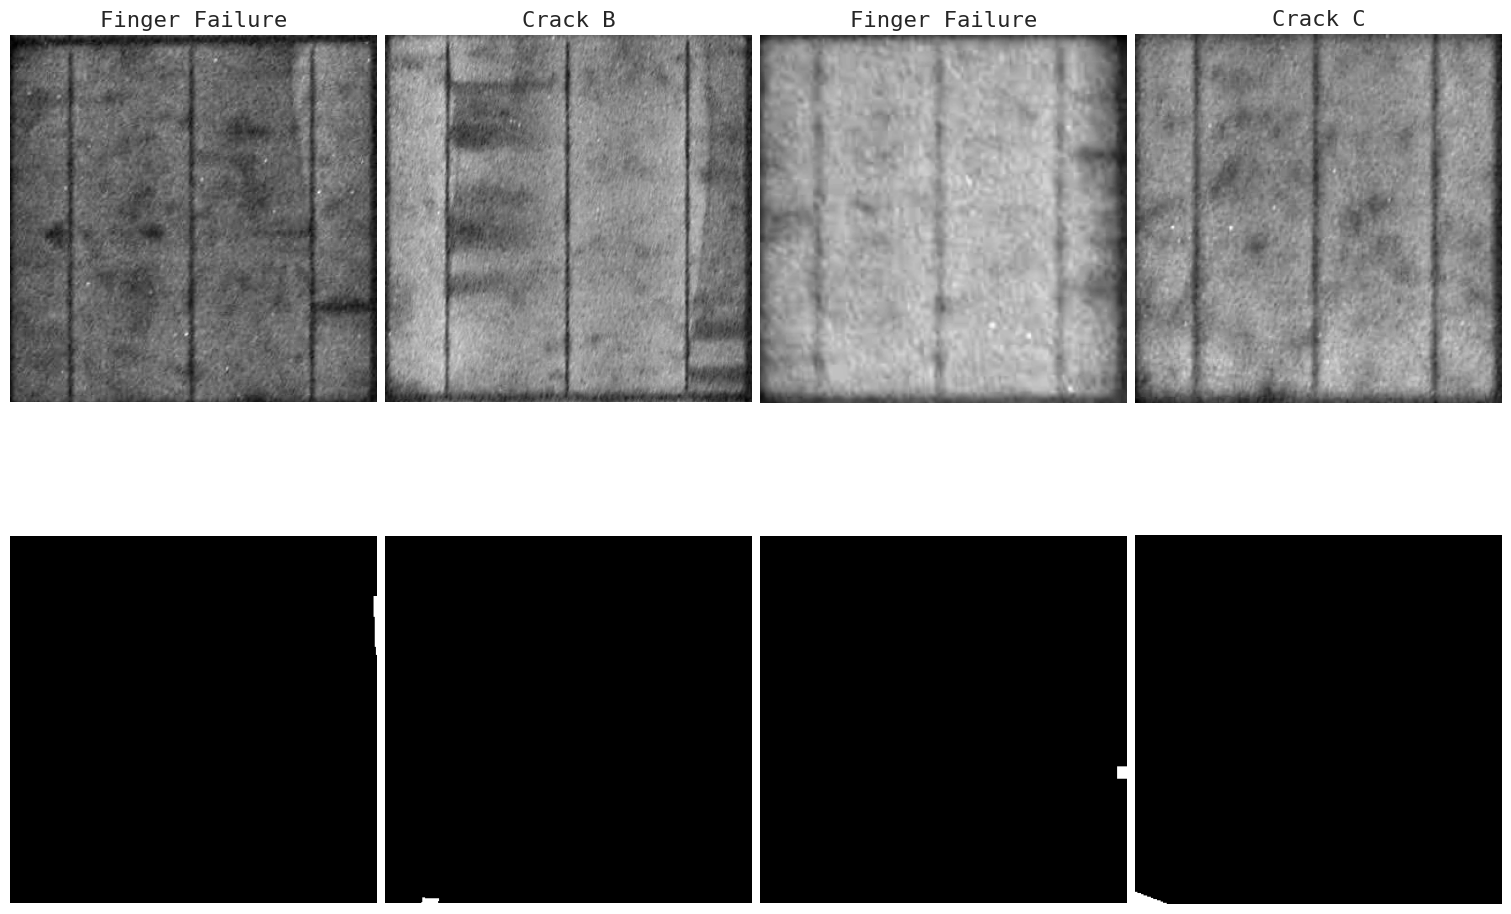

In [156]:
# Ceate a plot where each row is a label and first column is the image and the second column is the mask of the image
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
#remove the grid
for i in range(4):
    for j in range(2):
        ax[i, j].grid(False)
#remove the x and y ticks
for i in range(4):
    for j in range(2):
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()

for i, label in enumerate(data['Label'].unique()):
    if label == 'Negative':
        continue

    #Get random image form each label
    ridx = random.randint(0, len(data[data['Label'] == label]))
    random_dir = data[data['Label'] == label].iloc[ridx]['ImageDir']
    mask_dir = data[data['Label'] == label].iloc[ridx]['MaskDir']

    #Load the images
    image = np.array(Image.open(random_dir))
    mask = np.array(Image.open(mask_dir))*255

    ax[i-1, 0].imshow(image, cmap='gray')
    ax[i-1, 0].set_title(label)
    ax[i-1, 1].imshow(mask,cmap='gray')
    ax[i-1, 1].set_title(label)

TypeError: Image data of dtype object cannot be converted to float

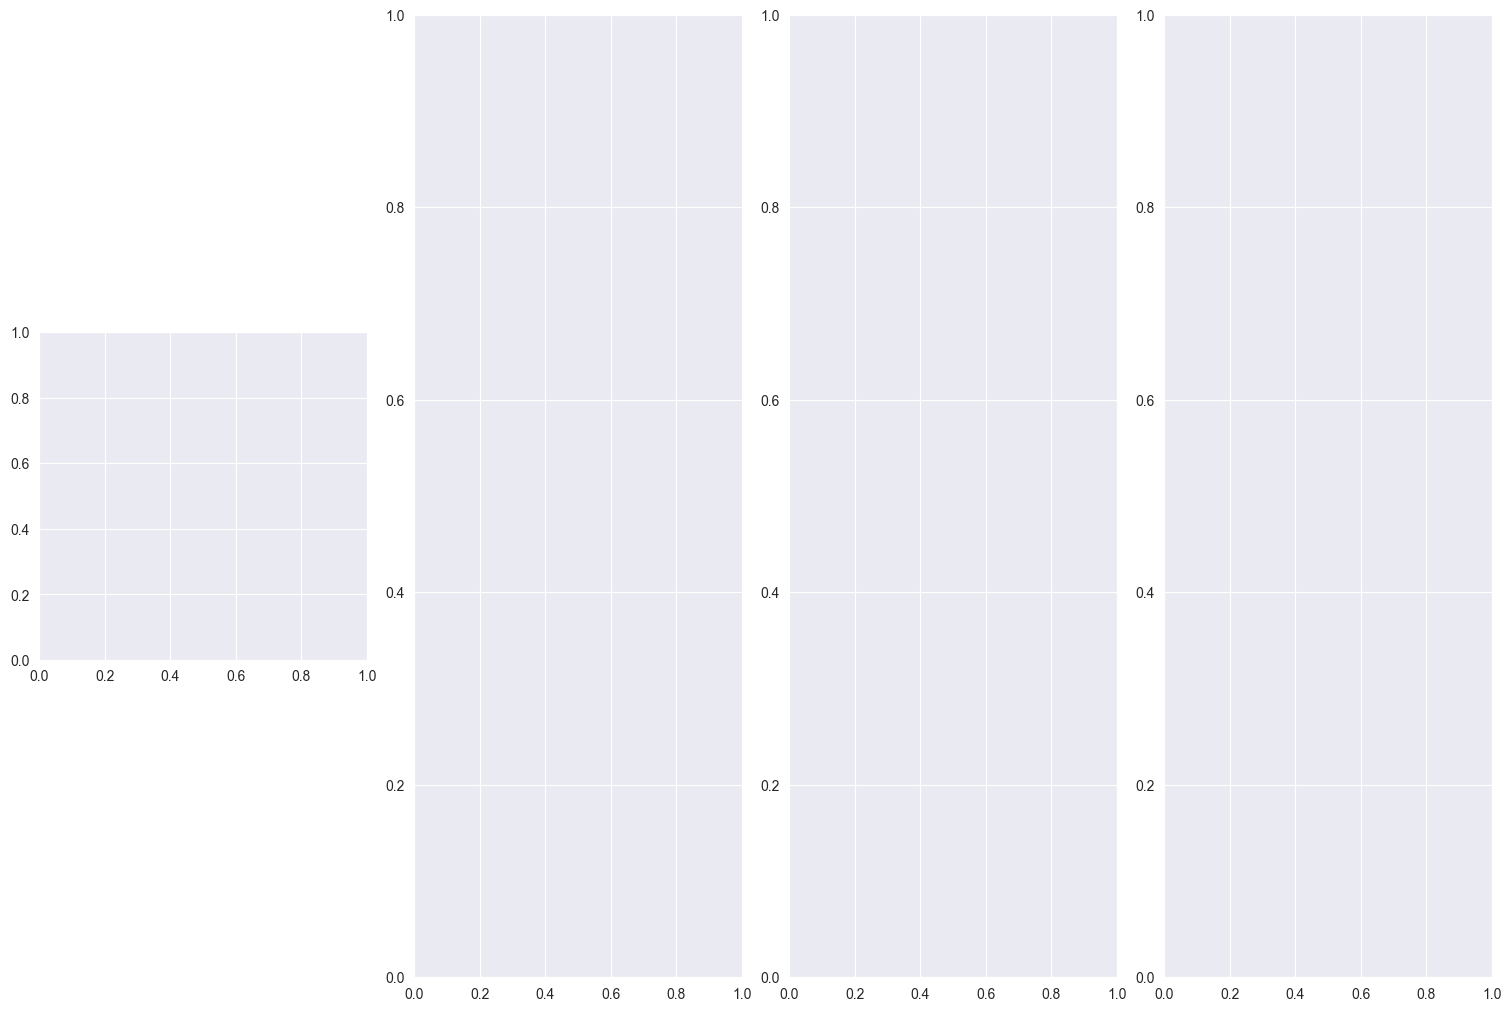

In [87]:
data[data['Label'] == label].iloc[0]['ImageDir']

/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_30936/3424483808.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 0.98, 'Examples of fault spillover')

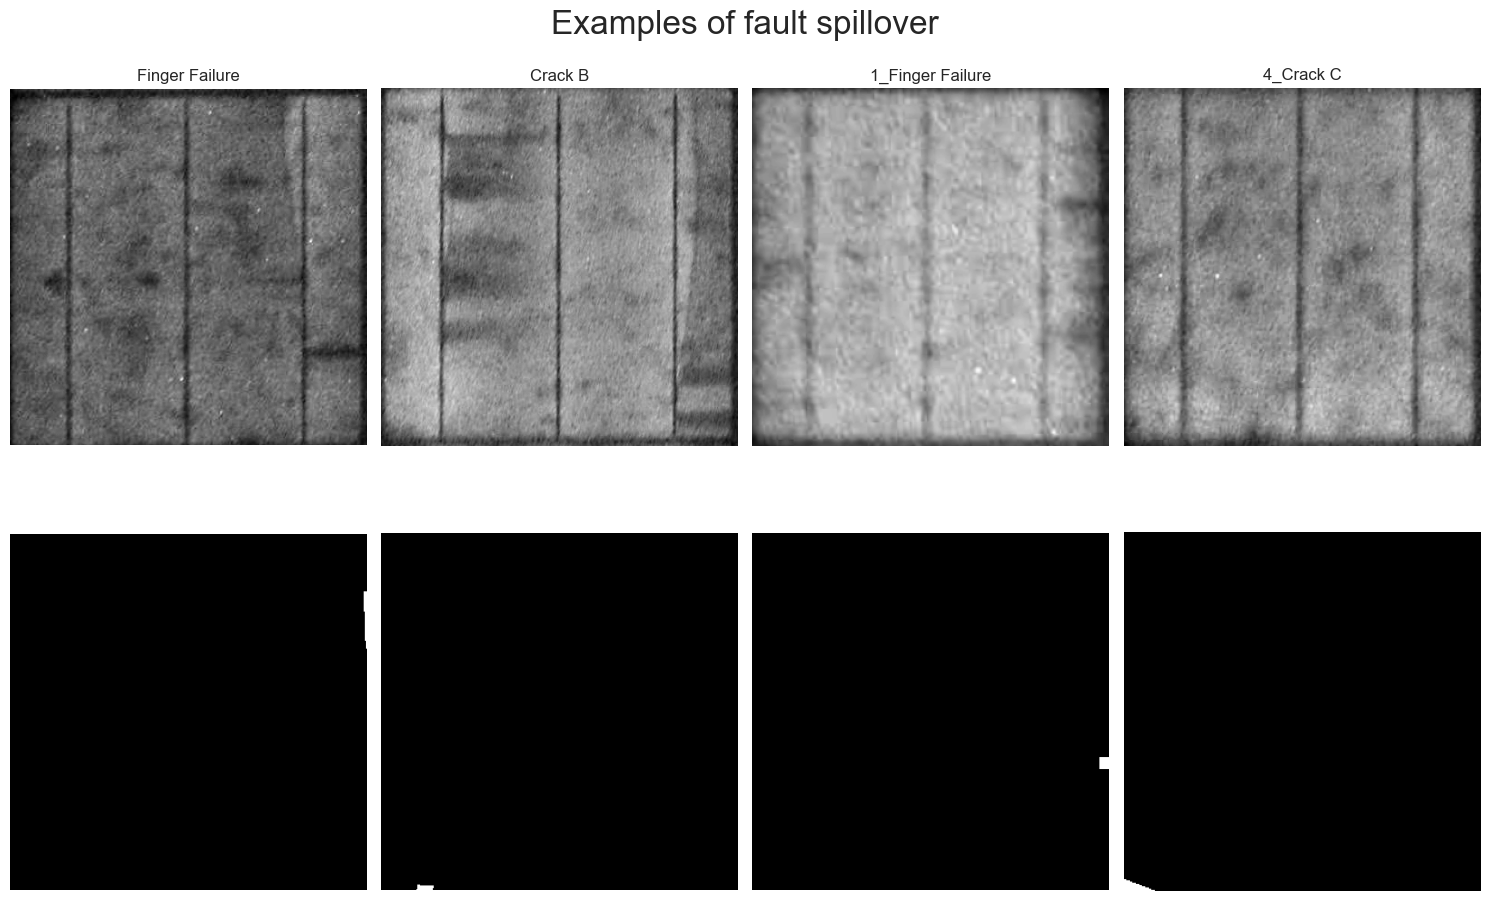

In [25]:
import pandas as pd
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Train.csv')

In [8]:
display(data.head())

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
0,14440,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,['Negative'],NaN,False
1,22593,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
2,21901,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
3,17351,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
4,1136,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False


In [59]:
dir = 'VitusData/Serier/Series1/CellsCorr/Serie_1_ImageCorr_-11_4089_Cell_Row7_Col_5.png'
source = Image.open(f'Data/{dir}')
mask = Image.open(f'Data/VitusData/Masks/-11_4089_Cell_Row7_Col_5_FingerFailure_1.png')
target = Image.open('Data/VitusData/Serier/Series3/CellsCorr/Serie_3_ImageCorr_-21_4311_PC_Cell_Row4_Col_4.png')

In [60]:
source = np.array(source)
mask = np.array(mask)/255
target = np.array(target)

In [61]:
# Reshape the target to be same size as source
target = cv2.resize(target, (source.shape[1], source.shape[0]))

In [62]:
# Define ofset for the mask
offset = (1,2)

In [63]:
# Invert the mask
inv_mask = (mask - 1)*-1

In [74]:
# Blur the mask's
mask = cv2.GaussianBlur(mask, (5,5), 0)
inv_mask = cv2.GaussianBlur(inv_mask, (5,5), 0)

In [77]:
# Of set the masks
mask = np.roll(mask, offset[0], axis=0)
mask = np.roll(mask, offset[1], axis=1)
inv_mask = np.roll(inv_mask, offset[0], axis=0)
inv_mask = np.roll(inv_mask, offset[1], axis=1)

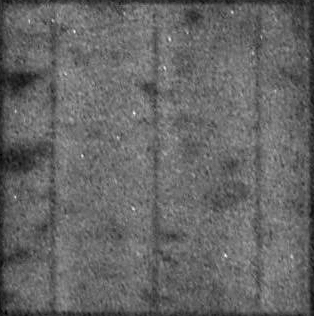

In [64]:
# Copy the masked area from the source to the target
Image.fromarray(source)

In [78]:
aug_im = inv_mask*target + mask*source

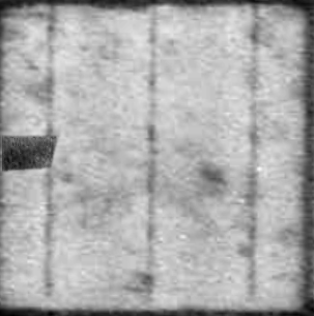

In [79]:
Image.fromarray(np.uint8(aug_im))

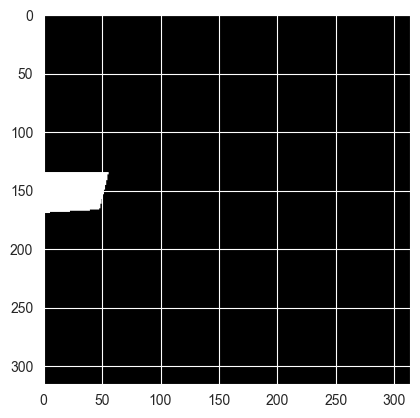

In [65]:
plt.imshow(mask,cmap = 'gray')

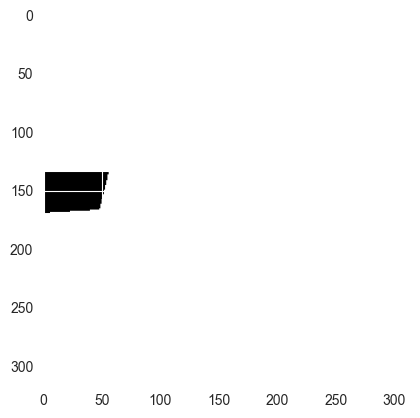

In [66]:
plt.imshow(inv_mask,cmap = 'gray')

In [67]:
inv_mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [80]:
data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Train.csv')

In [81]:
display(data)

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
0,14440,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,['Negative'],NaN,False
1,22593,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
2,21901,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
3,17351,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,['Negative'],NaN,False
4,1136,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False
...,...,...,...,...,...
21626,1458,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False
21627,16631,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,['Negative'],NaN,False
21628,8845,VitusData/Serier/Series2/CellsCorr/Serie_2_Ima...,['Negative'],NaN,False
21629,3391,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,['Negative'],NaN,False


In [83]:
import ast
data['Label'] = data['Label'].apply(lambda x: ast.literal_eval(x))
data['MaskDir'] = data['MaskDir'].apply(lambda x: ast.literal_eval(x) if str(x) != 'nan' else x)

In [94]:
def expand_set(data):
    """ Expands the dataset by creating a new row if the is multiple labels or masks for a single image"""
    new_data = pd.DataFrame(columns=data.columns)
    for i, row in data.iterrows():
        if len(row['Label']) > 1:
            for j, label in enumerate(row['Label']):
                new_row = row.copy()
                new_row['Label'] = label
                new_row['MaskDir'] = row['MaskDir'][j]
                new_data = new_data.append(new_row, ignore_index=True)
        else:
            # If there is only one label and mask for the image, just append the row but change the label and mask to a string
            new_row = row.copy()
            new_row['Label'] = row['Label'][0]
            if str(row['MaskDir']) != 'nan':
                new_row['MaskDir'] = row['MaskDir'][0]
            else:
                new_row['MaskDir'] = np.nan
            new_data = new_data.append(new_row, ignore_index=True)
    return new_data

In [95]:
data_expaneded = expand_set(data)

/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_44505/1711468143.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_44505/1711468143.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data = new_data.append(new_row, ignore_index=True)
/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_44505/1711468143.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)
/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_44505/1711468143.py:10: FutureWarning: In a future version, object-dtype columns w

In [96]:
display(data_expaneded)

,Unnamed: 0,ImageDir,Label,MaskDir,is_fault
0,14440,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,Negative,NaN,False
1,22593,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,Negative,NaN,False
2,21901,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,Negative,NaN,False
3,17351,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,Negative,NaN,False
4,1136,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,Negative,NaN,False
...,...,...,...,...,...
21831,1458,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,Negative,NaN,False
21832,16631,VitusData/Serier/Series3/CellsCorr/Serie_3_Ima...,Negative,NaN,False
21833,8845,VitusData/Serier/Series2/CellsCorr/Serie_2_Ima...,Negative,NaN,False
21834,3391,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,Negative,NaN,False


In [97]:
len(data_expaneded)

21836

In [98]:
data_expaneded.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Train_expanded.csv', index=False)

In [99]:
data_expaneded.groupby('Label').count()

,Unnamed: 0,ImageDir,MaskDir,is_fault
Label,,,,
CrackA,137,137,137,137
CrackB,164,164,164,164
CrackC,64,64,64,64
FingerFailure,146,146,146,146
Negative,21325,21325,0,21325


In [100]:
data_expaneded.groupby('is_fault').count()

,Unnamed: 0,ImageDir,Label,MaskDir
is_fault,,,,
False,21325,21325,21325,0
True,511,511,511,511
